<a href="https://colab.research.google.com/github/harshitjaiin/ML_Project/blob/main/BinaryPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing necessary libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import regularizers
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline

## Exploring the dataset

In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')
# Define the file path
file_path = '/content/drive/My Drive/nsl-kdd/KDDTrain+.txt'
# Read the dataset
data_train = pd.read_csv(file_path, header=None)

Mounted at /content/drive


In [ ]:
# Check data
data_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])

In [ ]:
# Assign name for columns
data_train.columns = columns

In [ ]:
data_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [ ]:
data_train.describe().style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.144650,45566.743000,19779.114421,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,0.001342,0.001103,0.302192,0.012669,0.000413,0.004096,0.000000,0.000008,0.009423,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.515310,5870331.181891,4021269.151440,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,0.036603,0.045154,24.399618,0.483935,0.022181,0.099370,0.000000,0.002817,0.096612,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,276.000000,516.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1379963888.000000,1309937401.000000,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.000000,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [ ]:
data_train.loc[data_train['outcome'] == "normal", "outcome"] = 'normal'
data_train.loc[data_train['outcome'] != 'normal', "outcome"] = 'attack'

In [ ]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

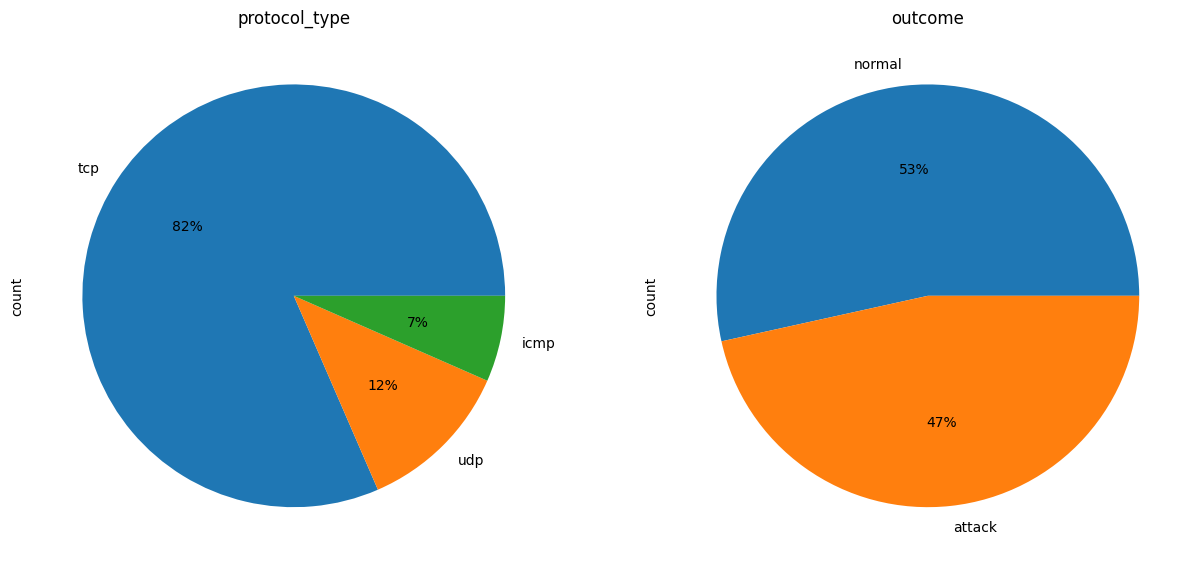

In [ ]:
pie_plot(data_train, ['protocol_type', 'outcome'], 1, 2)

## Preprocessing the data

In [ ]:
def Scaling(df_num, cols):
    std_scaler = RobustScaler()
    std_scaler_temp = std_scaler.fit_transform(df_num)
    std_df = pd.DataFrame(std_scaler_temp, columns =cols)
    return std_df

In [ ]:
cat_cols = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login', 'level', 'outcome']
def preprocess(dataframe):
    df_num = dataframe.drop(cat_cols, axis=1)
    num_cols = df_num.columns
    scaled_df = Scaling(df_num, num_cols)

    dataframe.drop(labels=num_cols, axis="columns", inplace=True)
    dataframe[num_cols] = scaled_df[num_cols]
    dataframe.dropna(inplace=True)
    dataframe.drop_duplicates(inplace=True)

    dataframe.loc[dataframe['outcome'] == "normal", "outcome"] = 0
    dataframe.loc[dataframe['outcome'] != 0, "outcome"] = 1

    dataframe = pd.get_dummies(dataframe, columns = ['protocol_type', 'service', 'flag'])

    # this is a test
    return dataframe

In [ ]:
scaled_train = preprocess(data_train)
scaled_train

,land,logged_in,is_host_login,is_guest_login,outcome,level,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,0,20,0.0,1.619565,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.085106,-0.3750,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,-0.606936,-0.155102,-0.357895,0.142857,2.833333,0.0,0.00,0.00,0.05,0.00,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,0,0,0,0,0,15,0.0,0.369565,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.007092,-0.4375,0.0,0.0,0.0,0.0,-1.010989,2.500000,0.00,0.000000,-0.253061,-0.536842,8.285714,14.666667,0.0,0.00,0.00,0.00,0.00,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,0,0,0,0,1,19,0.0,-0.159420,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.773050,-0.1250,1.0,1.0,0.0,0.0,-1.043956,1.166667,0.00,0.000000,-0.151020,-0.431579,0.428571,0.000000,0.0,1.00,1.00,0.00,0.00,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,0,1,0,0,0,21,0.0,0.681159,15.800388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
x = scaled_train.drop(['outcome', 'level'] , axis = 1).values
y = scaled_train['outcome'].values
y_reg = scaled_train['level'].values

pca = PCA(n_components=20)
pca = pca.fit(x)
x_reduced = pca.transform(x)
print("Number of original features is {} and of reduced features is {}".format(x.shape[1], x_reduced.shape[1]))

y = y.astype('int')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y, test_size=0.2, random_state=42)
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x, y_reg, test_size=0.2, random_state=42)

Number of original features is 122 and of reduced features is 20


## ***Evaluate ML Models Function***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    # Predictions
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Compute confusion matrix for both train and test sets
    train_confusion_matrix = metrics.confusion_matrix(y_train, train_pred)
    test_confusion_matrix = metrics.confusion_matrix(y_test, test_pred)

    # Calculate metrics
    train_accuracy = metrics.accuracy_score(y_train, train_pred)
    train_precision = metrics.precision_score(y_train, train_pred)
    train_recall = metrics.recall_score(y_train, train_pred)
    train_f1 = metrics.f1_score(y_train, train_pred)

    test_accuracy = metrics.accuracy_score(y_test, test_pred)
    test_precision = metrics.precision_score(y_test, test_pred)
    test_recall = metrics.recall_score(y_test, test_pred)
    test_f1 = metrics.f1_score(y_test, test_pred)

    # Print metrics
    print(f"Training Metrics for {name}:")
    print(f"Accuracy: {train_accuracy*100:.2f}%, Precision: {train_precision*100:.2f}%, Recall: {train_recall*100:.2f}%, F1 Score: {train_f1*100:.2f}%")
    print(f"Testing Metrics for {name}:")
    print(f"Accuracy: {test_accuracy*100:.2f}%, Precision: {test_precision*100:.2f}%, Recall: {test_recall*100:.2f}%, F1 Score: {test_f1*100:.2f}%")

    # Plot confusion matrix
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    sns.heatmap(train_confusion_matrix, annot=True, fmt='g')
    plt.title(f'Training Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    plt.subplot(1, 2, 2)
    sns.heatmap(test_confusion_matrix, annot=True, fmt='g')
    plt.title(f'Testing Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    plt.show()


## ***Models Training + evaluation + Confision Matrix***

### Logistic Regression

Training Metrics for Logistic Regression:
Accuracy: 89.22%, Precision: 86.94%, Recall: 90.42%, F1 Score: 88.64%
Testing Metrics for Logistic Regression:
Accuracy: 88.68%, Precision: 86.66%, Recall: 89.43%, F1 Score: 88.02%


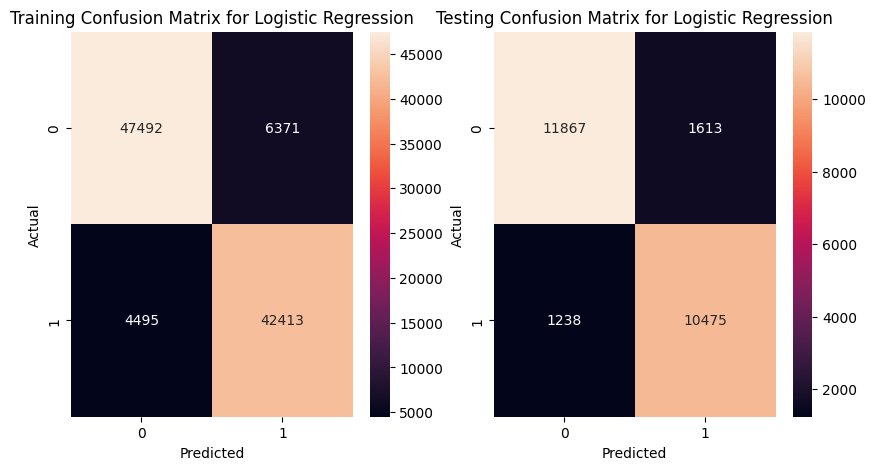

In [ ]:
lr = LogisticRegression().fit(x_train, y_train)
evaluate_classification(lr, "Logistic Regression", x_train, x_test, y_train, y_test)

### Gaussian Naive Bayes

Training Metrics for GaussianNB:
Accuracy: 92.00%, Precision: 92.43%, Recall: 90.20%, F1 Score: 91.30%
Testing Metrics for GaussianNB:
Accuracy: 91.44%, Precision: 91.96%, Recall: 89.40%, F1 Score: 90.66%


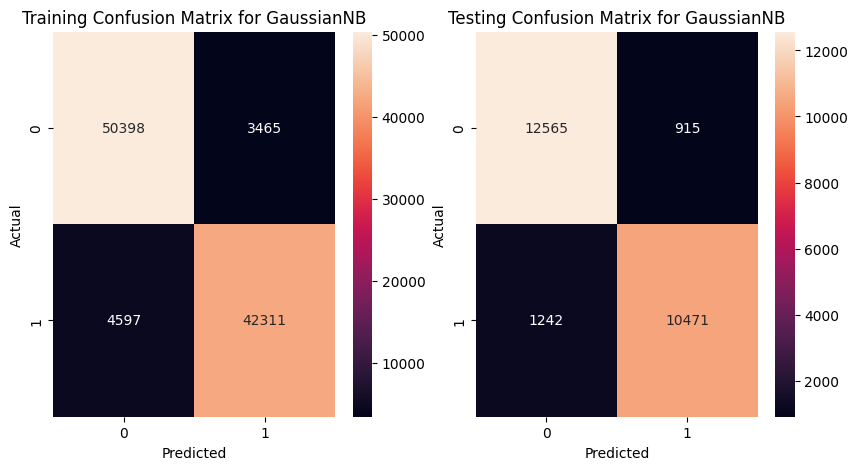

In [ ]:
gnb = GaussianNB().fit(x_train, y_train)
evaluate_classification(gnb, "GaussianNB", x_train, x_test, y_train, y_test)

### SVM

In [ ]:
lin_svc = svm.LinearSVC().fit(x_train, y_train)

Training Metrics for Linear SVC(LBasedImpl):
Accuracy: 97.23%, Precision: 98.01%, Recall: 96.00%, F1 Score: 97.00%
Testing Metrics for Linear SVC(LBasedImpl):
Accuracy: 97.20%, Precision: 98.13%, Recall: 95.80%, F1 Score: 96.95%


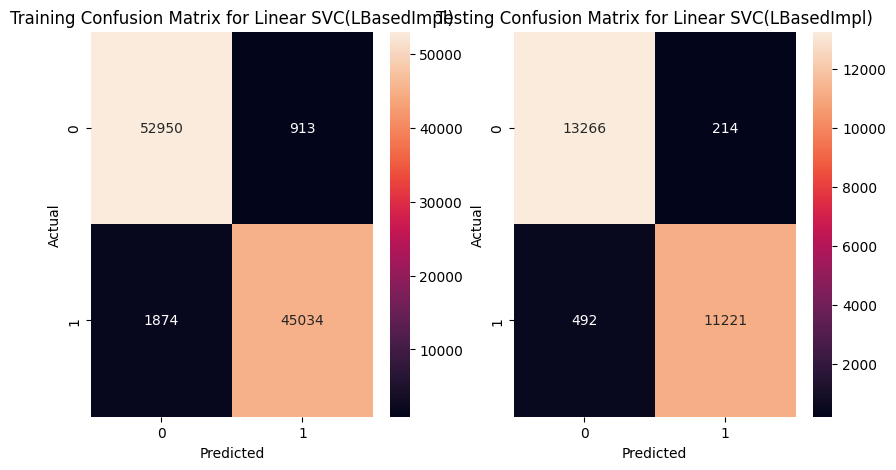

In [ ]:
evaluate_classification(lin_svc, "Linear SVC(LBasedImpl)", x_train, x_test, y_train, y_test)

### Decison Tree

Training Metrics for DecisionTreeClassifier:
Accuracy: 100.00%, Precision: 100.00%, Recall: 99.99%, F1 Score: 100.00%
Testing Metrics for DecisionTreeClassifier:
Accuracy: 99.81%, Precision: 99.75%, Recall: 99.85%, F1 Score: 99.80%


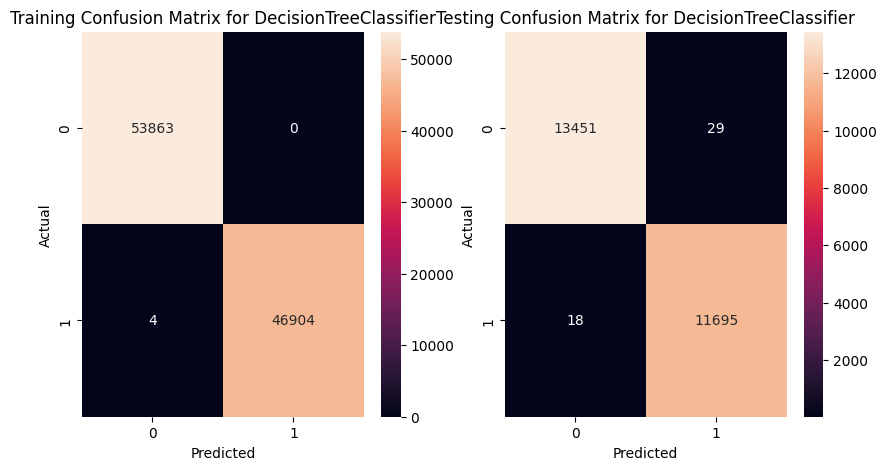

In [ ]:
dt = DecisionTreeClassifier(max_depth=3).fit(x_train, y_train)
tdt = DecisionTreeClassifier().fit(x_train, y_train)
evaluate_classification(tdt, "DecisionTreeClassifier", x_train, x_test, y_train, y_test)

### features Importance

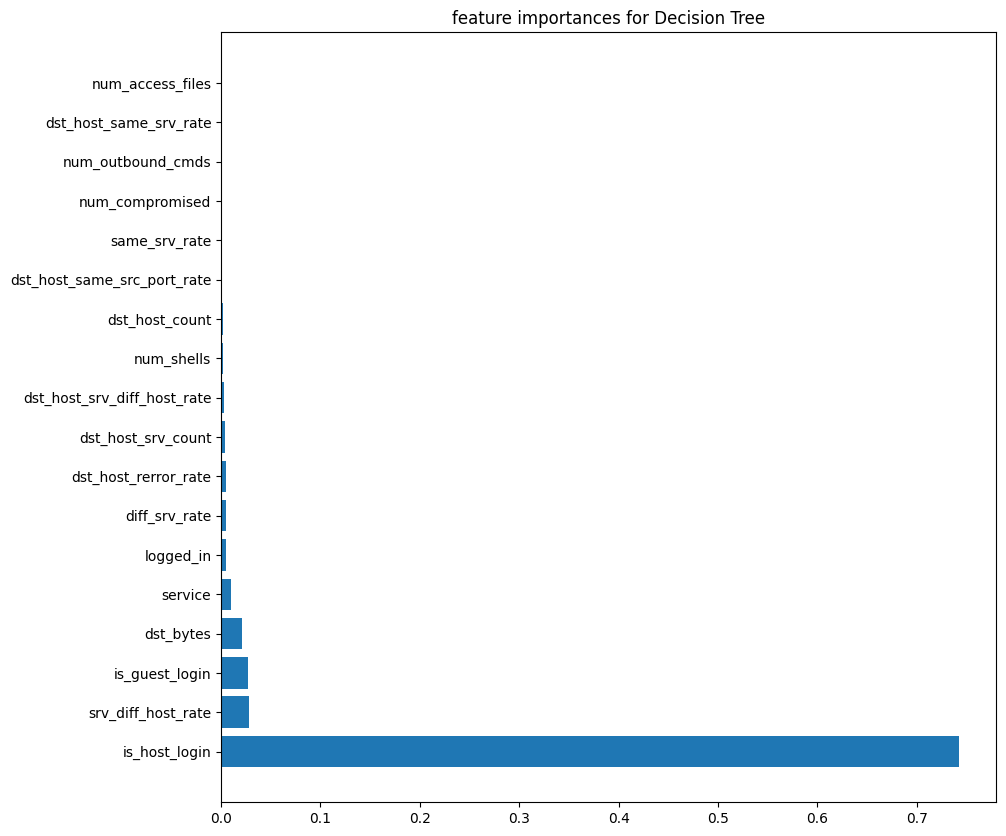

In [ ]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.figure(figsize=(10,10))
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for Decision Tree')
    plt.show()

features_names = data_train.drop(['outcome', 'level'] , axis = 1)
f_importances(abs(tdt.feature_importances_), features_names, top=18)

### Random Forest

Training Metrics for RandomForestClassifier:
Accuracy: 100.00%, Precision: 99.99%, Recall: 100.00%, F1 Score: 100.00%
Testing Metrics for RandomForestClassifier:
Accuracy: 99.87%, Precision: 99.90%, Recall: 99.82%, F1 Score: 99.86%


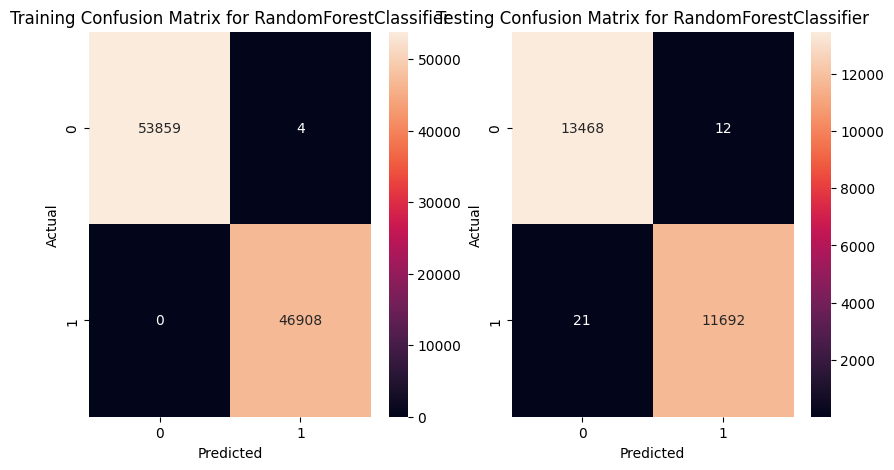

In [ ]:
rf = RandomForestClassifier().fit(x_train, y_train)
evaluate_classification(rf, "RandomForestClassifier", x_train, x_test, y_train, y_test)

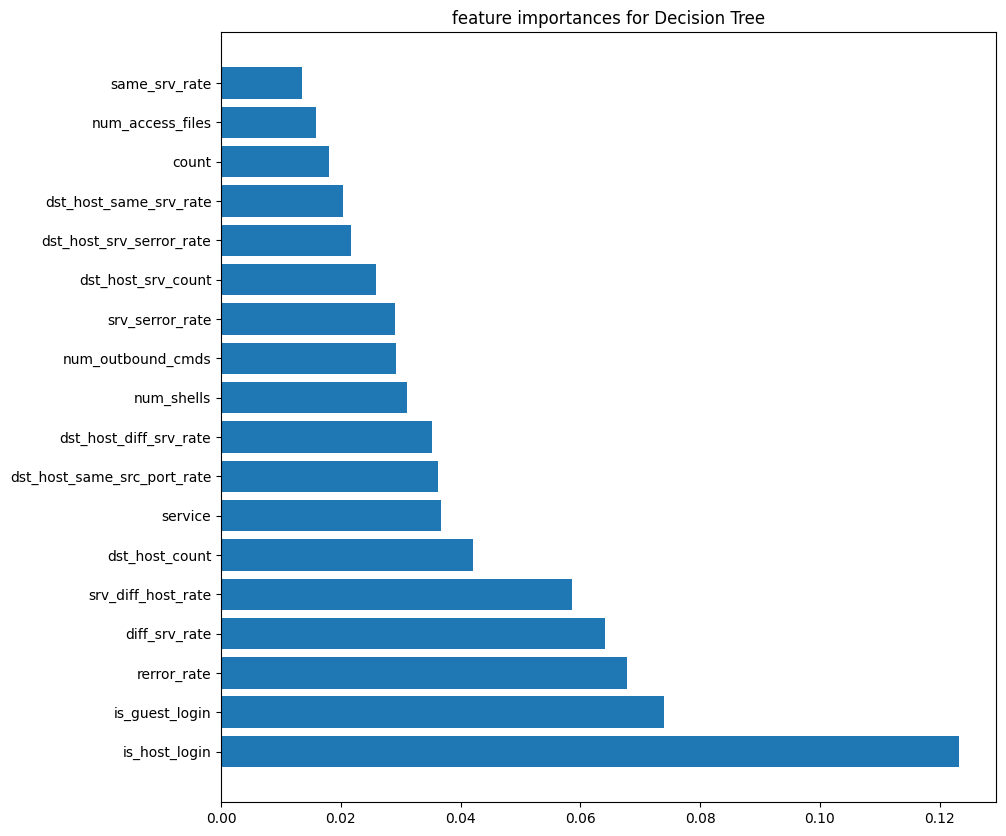

In [ ]:
f_importances(abs(rf.feature_importances_), features_names, top=18)

## ***Build Neural Network Model***

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' for multi-class classification

## ***Standardize features***

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

## ***CNN Model Training***

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9620 - loss: 0.1149 - val_accuracy: 0.9908 - val_loss: 0.0286
Epoch 2/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9919 - loss: 0.0244 - val_accuracy: 0.9924 - val_loss: 0.0226
Epoch 3/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9934 - loss: 0.0200 - val_accuracy: 0.9941 - val_loss: 0.0183
Epoch 4/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9941 - loss: 0.0175 - val_accuracy: 0.9941 - val_loss: 0.0174
Epoch 5/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9942 - loss: 0.0163 - val_accuracy: 0.9954 - val_loss: 0.0158
Epoch 6/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9949 - loss: 0.0148 - val_accuracy: 0.9932 - val_loss: 0.0194
Epoch 7/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9955 - loss: 0.0141 - val_accuracy: 0.9951 - val_loss: 0.0145
Epoch 8/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9954 - loss: 0.0135 - 

## ***Model Evaluation***

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    # Convert probabilities to binary labels
    train_pred = (model.predict(X_train) > 0.5).astype("int32")
    test_pred = (model.predict(X_test) > 0.5).astype("int32")

    # Calculate metrics for training data
    train_accuracy = metrics.accuracy_score(y_train, train_pred)
    train_precision = metrics.precision_score(y_train, train_pred)
    train_recall = metrics.recall_score(y_train, train_pred)
    train_f1 = metrics.f1_score(y_train, train_pred)

    # Calculate metrics for testing data
    test_accuracy = metrics.accuracy_score(y_test, test_pred)
    test_precision = metrics.precision_score(y_test, test_pred)
    test_recall = metrics.recall_score(y_test, test_pred)
    test_f1 = metrics.f1_score(y_test, test_pred)

    # Print metrics
    print(f"Training Metrics for {name}:")
    print(f"Accuracy: {train_accuracy*100:.2f}%, Precision: {train_precision*100:.2f}%, Recall: {train_recall*100:.2f}%, F1 Score: {train_f1*100:.2f}%")
    print(f"Testing Metrics for {name}:")
    print(f"Accuracy: {test_accuracy*100:.2f}%, Precision: {test_precision*100:.2f}%, Recall: {test_recall*100:.2f}%, F1 Score: {test_f1*100:.2f}%")

    # Confusion matrices
    train_confusion_matrix = metrics.confusion_matrix(y_train, train_pred)
    test_confusion_matrix = metrics.confusion_matrix(y_test, test_pred)

    # Plot confusion matrix for training data
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.heatmap(train_confusion_matrix, annot=True, fmt='g')
    plt.title(f'Training Confusion Matrix for {name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')

    # Plot confusion matrix for testing data
    plt.subplot(1, 2, 2)
    sns.heatmap(test_confusion_matrix, annot=True, fmt='g')
    plt.title(f'Testing Confusion Matrix for {name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


evaluate_classification(model, "CNN", x_train, x_test, y_train, y_test)


## ***Optimisation Using RandomizedSearchCV***